In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from htorch import layers
import time

In [9]:
device = torch.device('cuda:0')

data = torch.tensor(pd.read_csv("../data/mnist/train.csv", header=None).values)
x, y = (data[:, 1:]/255).float().to(device), torch.nn.functional.one_hot(data[:, 0].long(), 10).to(device)

test = torch.tensor(pd.read_csv("../data/mnist/test.csv", header=None).values)
x_test, y_test = (test[:, 1:]/255).float().to(device), torch.nn.functional.one_hot(test[:, 0].long(), 10).to(device)

In [10]:
class Quat(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.QLinear(196, 75)
        self.fc2 = layers.QLinear(75, 25)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = Quat()
model.to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=1.2e-3)
losses = []
trainacc = []
testacc =[]

scale = 0.025253813613805267
img_mat = tensor([[-0.6225, -0.5411,  0.8826,  ...,  0.8321, -0.1465,  0.8679],
        [-0.0258, -0.4183,  0.0636,  ..., -0.9900, -0.5109,  0.8012],
        [-0.9756, -0.2107,  0.9083,  ...,  0.2696, -0.8615,  0.9199],
        ...,
        [ 0.0073,  0.1059, -0.4442,  ...,  0.0609, -0.4269,  0.7132],
        [ 0.5318,  0.6477,  0.1903,  ...,  0.4658, -0.1340,  0.0898],
        [ 0.1720,  0.2263, -0.9258,  ..., -0.0897, -0.8882,  0.1624]])
r.shape = torch.Size([196, 75]) i.shape = torch.Size([196, 75]) j.shape = torch.Size([196, 75]) k.shape = torch.Size([196, 75])
scale = 0.040824829046386304
img_mat = tensor([[ 0.8831, -0.7245, -0.1785,  ...,  0.2256,  0.9464, -0.9185],
        [ 0.8605,  0.5909, -0.9890,  ...,  0.1944, -0.0120, -0.7522],
        [ 0.4972,  0.6775, -0.6602,  ..., -0.9762,  0.5818, -0.7686],
        ...,
        [ 0.4244, -0.1450,  0.1192,  ..., -0.3717, -0.4632, -0.7314],
        [-0.8995,  0.2593, -0.9050,  ..., -0.5692, -0.6757,  0.4232

/home/aritra/project/quartLT23/htorch/quaternion.py:491: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:350.)
  if self.dim() == 1:
/home/aritra/project/quartLT23/htorch/quaternion.py:494: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:350.)
  out = self.q[:, :self.shape[1] // 4]
/home/aritra/project/quartLT23/htorch/quaternion.py:500: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:350.)
  if self.dim() == 1:
/home/aritra/project/quartLT23/htorch/quaternion.py:504: UserWarning: Defining your `_

In [11]:
t_f = 0
t_b = 0

for epoch in tqdm(range(1000)):
    batch_size = 2**13
    for i in range(0, len(x), batch_size):
        batch_x, batch_y = x[i:i+batch_size], y[i:i+batch_size].float()
        optimiser.zero_grad()
        t0 = time.time()
        output = model(batch_x)
        t_f += time.time() - t0
        t0 = time.time()
        loss = F.mse_loss(output, batch_y)
        loss.backward()
        t_b += time.time() - t0
        optimiser.step()
    losses.append(loss.item())
t_f, t_b

100%|██████████| 1000/1000 [00:24<00:00, 40.60it/s]


(17.512548446655273, 3.4841349124908447)

Training Accuracy: 99.92%
Testing Accuracy: 97.55%


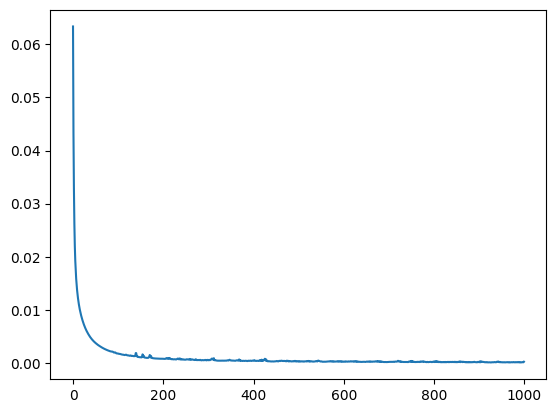

In [12]:
accuracy = (model(x).argmax(1) == y.argmax(1)).sum().item()/len(x)
print(f"Training Accuracy: {accuracy*100:.2f}%")

accuracy = (model(x_test).argmax(1) == y_test.argmax(1)).sum().item()/len(x_test)
print(f"Testing Accuracy: {accuracy*100:.2f}%")

plt.plot(range(len(losses)), losses)

In [13]:
# for epoch in tqdm(range(80)):
#     batch_size = 60
#     for i in range(0, len(x), batch_size):
#         batch_x, batch_y = x[i:i+batch_size], y[i:i+batch_size].float()
#         optimiser.zero_grad()
#         output = model(batch_x)
#         loss = F.mse_loss(output, batch_y)
#         loss.backward()
#         optimiser.step()
#     losses.append(loss.item())
    
#     accuracy = (model(x).argmax(1) == y.argmax(1)).sum().item()/len(x)
#     trainacc.append(accuracy)
#     # print(f"Training Accuracy: {accuracy*100:.2f}%")

#     accuracy = (model(x_test).argmax(1) == y_test.argmax(1)).sum().item()/len(x_test)
#     # print(f"Testing Accuracy: {accuracy*100:.2f}%")
#     testacc.append(accuracy)

# plt.plot(range(len(trainacc)), trainacc, label='training')
# plt.plot(range(len(testacc)), testacc,label = 'testing')
# plt.legend()